In the formula of the power of a statical test there are four inter-related parametres: 

Significance level (1), Sample Size (2) Effect Size (3), Power (4) 

**Effect sizes** as estimated with Cohen’s **d** 0.20,  0.50,   0.80, and   1.3 are regarded as small, medium, large, and very large.

In the simpliest scenario (one sample t-test) the effect size is estimated as the mean devided by the standard deviation.



Cohens_d_4panel_2.png

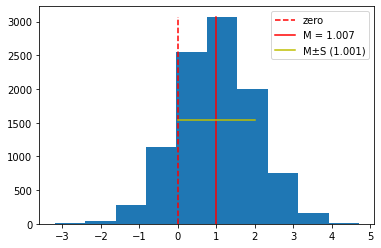

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

effect_size = 1

mu = 1;
sigma = mu / effect_size;
n = 10000;
XX = np.random.randn(n)*sigma + mu # here indicate the sample size

nn ,bins, patches = plt.hist(XX, 10);
M = np.mean(XX);
S = np.std(XX)
MA = max(nn)
plt.plot([0, 0], [0, MA], 'r--', label = 'zero');
plt.plot([M, M], [0, MA], 'r', label = 'M = ' + str(round(M, 3)));
plt.plot([M-S, M+S], [MA/2, MA/2], 'y', label = 'M\u00B1S (' + str(round(S, 3)) + ')');

plt.legend(loc="upper right");

p<0.05 significane: True


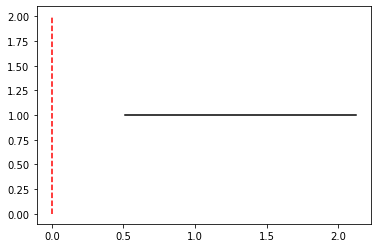

In [ ]:
# cell 1

# a single statistical test (simplified ttest)
# genearate data
import numpy as np
import matplotlib.pyplot as plt

mu, sigma, n = 1, 1, 5 # those are parametres of the nomral distibutuition
XX = mu + sigma * np.random.randn(n) # here indicate the sample size

# statistical test
M=np.mean(XX) # empiric mean
S=np.std(XX) # empiric standard deviation

L = len(XX)
EM = S / (L-1)**(1/2) # standard error
CI1 = M - EM * 2
CI2 = M + EM * 2

print("p<0.05 significane: {:}".format(CI1 > 0) )

plt.plot([0, 0], [0, 2], 'r--');
plt.plot([CI1, CI2], [1, 1], 'k');

power of the test: 0.29


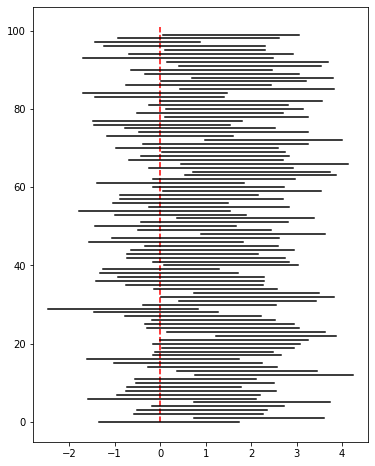

In [ ]:
# cell 2

# simulate the power of given effect size, alpha and n
import numpy as np

# effect sizes Cohen’s d 0.20, 0.50, 0.80, and 1.3 : small, medium, large, and very large 
effect_size = 0.2 # which is mu / sigma

mu = 1
sigma = mu / effect_size 
n = 40

plt.figure(figsize=(6, 8))
plt.plot([0, 0], [0, 101], 'r--');

sampled_sign = np.array([])

for i in range(100):

  XX = mu + sigma * np.random.randn(n) # here indicate the sample size

  # statistical test
  M=np.mean(XX) # empiric mean
  S=np.std(XX) # empiric standard deviation

  L = len(XX)
  EM = S / (L-1)**(1/2) # standard error
  CI1 = M - EM * 2
  CI2 = M + EM * 2

  sampled_sign = np.append(sampled_sign, int(CI1>0))

  plt.plot([CI1, CI2], np.array([1, 1])*i, 'k');

print("power of the test: {:.2f}".format(np.mean(sampled_sign)) )

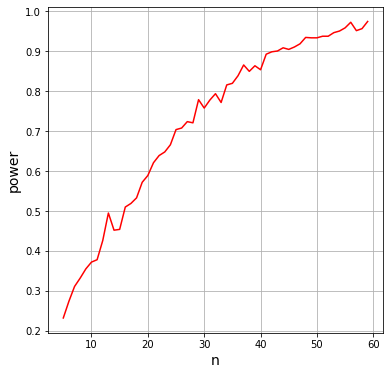

In [ ]:
# cell 3

# draw the dependance of the power of the smaple size given effect size and alpha
import numpy as np

# effect sizes Cohen’s d 0.20, 0.50, 0.80, and 1.3 : small, medium, large, and very large 
effect_size = 0.5
mu = 1
sigma = mu / effect_size 

powers = np.array([])

n_max = 60

for n in range(5,n_max):

  sampled_sign = np.array([])

  for i in range(1000):

    XX = mu + sigma * np.random.randn(n) # here indicate the sample size

    # statistical test
    M=np.mean(XX) # empiric mean
    S=np.std(XX) # empiric standard deviation

    L = len(XX)
    EM = S / (L-1)**(1/2) # standard error
    CI1 = M - EM * 2
    CI2 = M + EM * 2

    sampled_sign = np.append(sampled_sign, int(CI1>0))
  
  powers = np.append(powers, np.mean(sampled_sign))

plt.figure(figsize=(6, 6))
plt.plot(range(5, n_max), powers, 'r');
plt.grid()
plt.xlabel("n", fontsize=14);
plt.ylabel("power", fontsize=14);